# Proyek Analisis Data: Bike Sharing Dataset

- **Nama:** Feby Prasetyo
- **Email:** feby.prasetyo@students.utdi.ac.id
- **ID Dicoding:** -

## Menentukan Pertanyaan Bisnis

- Apakah terdapat korelasi antara kondisi cuaca dan tingkat penyewaan sepeda?
- Bagaimana perubahan tren penggunaan sepeda dari satu musim ke musim lainnya?
- Apakah terdapat pola tertentu dalam penyewaan sepeda antara hari kerja dan hari libur?

## Import Semua Packages/Library yang Digunakan

In [1]:
# import semua library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# memuat tabel day
days_df = pd.read_csv("https://raw.githubusercontent.com/febbyprasetyo/proyek_analisis_data/main/data/day.csv")
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# memuat tabel hour
hour_df = pd.read_csv("https://raw.githubusercontent.com/febbyprasetyo/proyek_analisis_data/main/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

**tabel days_df**

In [4]:
# mengecek keberadaan missing value
days_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [5]:
# mengecek duplikat data
print("Jumlah duplikasi: ", days_df.duplicated().sum())

Jumlah duplikasi:  0


Ketika menjalankan kode di atas, tidak terdapat data yang duplikasi.

In [6]:
# memeriksa tipe data
print(days_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


Berdasarkan hasil yang diberikan, ada kesalahan tipe data pada kolom dteday, yang seharusnya bertipe datetime tetapi saat ini bertipe object.

**tabel hour_df**

In [7]:
# mengecek keberadaan missing value
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [8]:
# mengecek duplikat data
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


Berdasarkan hasil pemeriksaan pada tabel hour_df, tidak ditemukan nilai yang hilang maupun data yang duplikat.

In [9]:
# memeriksa tipe data
print(hour_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


Dari hasil keluaran di atas, terlihat bahwa terdapat kesalahan tipe data pada kolom dteday, yang seharusnya berupa datetime namun saat ini masih dalam format object.

### Cleaning Data

**tabel days_df**

In [10]:
# Memperbaiki tipe data
days_df["dteday"] = pd.to_datetime(days_df["dteday"])
print(days_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**tabel hour_df**

In [11]:
# memperbaiki tipe data
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
print(hour_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore Data days_df

In [12]:
# rangkuman statistik dari data days_df
days_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [13]:
# Distribusi penyewaan sepeda Berdasarkan Musim
season_map = {1: "Springer", 2: "Summer", 3: "Fall", 4: "Winter"}
days_df["season"] = days_df["season"].replace(season_map)
season_counts = days_df["season"].value_counts().sort_index()
print(season_counts)

season
Fall        188
Springer    181
Summer      184
Winter      178
Name: count, dtype: int64


berdasarkan tabel diatas, diketahui bahwa penyewaan sepeda tertinggi terjadi pada musim gugur dan penyewaan sepeda terendah terjadi pada musim semi

In [14]:
# Distribusi penyewaan sepeda Berdasarkan Tahun
year_map = {0: "2011", 1: "2012"}
days_df["yr"] = days_df["yr"].map(year_map)
year_counts = days_df["yr"].value_counts().sort_index()
print(year_counts)

yr
2011    365
2012    366
Name: count, dtype: int64


berdasarkan tabel diatas, diketahui bahwa penyewaan sepeda tertinggi terjadi pada tahun 2012 yang mencapai 366

In [15]:
# Distribusi penyewaan sepeda Berdasarkan bulan
days_df.mnth.value_counts().sort_index()

,count
mnth,
1,62
2,57
3,62
4,60
5,62
6,60
7,62
8,62
9,60


berdasarkan tabel diatas, diketahui bahwa tren penggunaan layanan sewa sepeda berbeda-beda di bulan, namun penyewaan terendah terjadi pada bulan 2

In [16]:
# Distribusi penyewaan sepeda Berdasarkan hari kerja
days_df["workingday"] = days_df["workingday"].replace({0: "Holiday", 1: "Working Day"})
print(days_df["workingday"].value_counts().sort_index())

workingday
Holiday        231
Working Day    500
Name: count, dtype: int64


berdasarkan tabel diatas, diketahui bahwa penyewaan sepeda tertinggi terjadi pada hari kerja yang mencapai 500

In [17]:
# Distribusi penyewaan sepeda Berdasarkan kondisi cuaca
weather_map = {1: "Clear", 2: "Mist + Cloudy", 3: "Light Snow", 4: "Heavy Rain"}
days_df["weathersit"] = days_df["weathersit"].replace(weather_map)
print(days_df["weathersit"].value_counts().sort_index())

weathersit
Clear            463
Light Snow        21
Mist + Cloudy    247
Name: count, dtype: int64


Berdasarkan output diatas, cuaca cerah (weather_Clear) menunjukkan korelasi positif yang kuat dengan tingkat penggunaan sepeda (cnt), yang berarti lebih banyak orang menggunakan layanan berbagi sepeda saat cuaca cerah. Sebaliknya, kondisi cuaca buruk seperti salju ringan (weather_Light Snow) dan berkabut disertai cuaca berawan (weather_Mist + Cloudy) menunjukkan korelasi negatif dengan tingkat penggunaan sepeda (cnt), yang menunjukkan lebih sedikit orang menggunakan layanan berbagi sepeda dalam kondisi cuaca buruk.

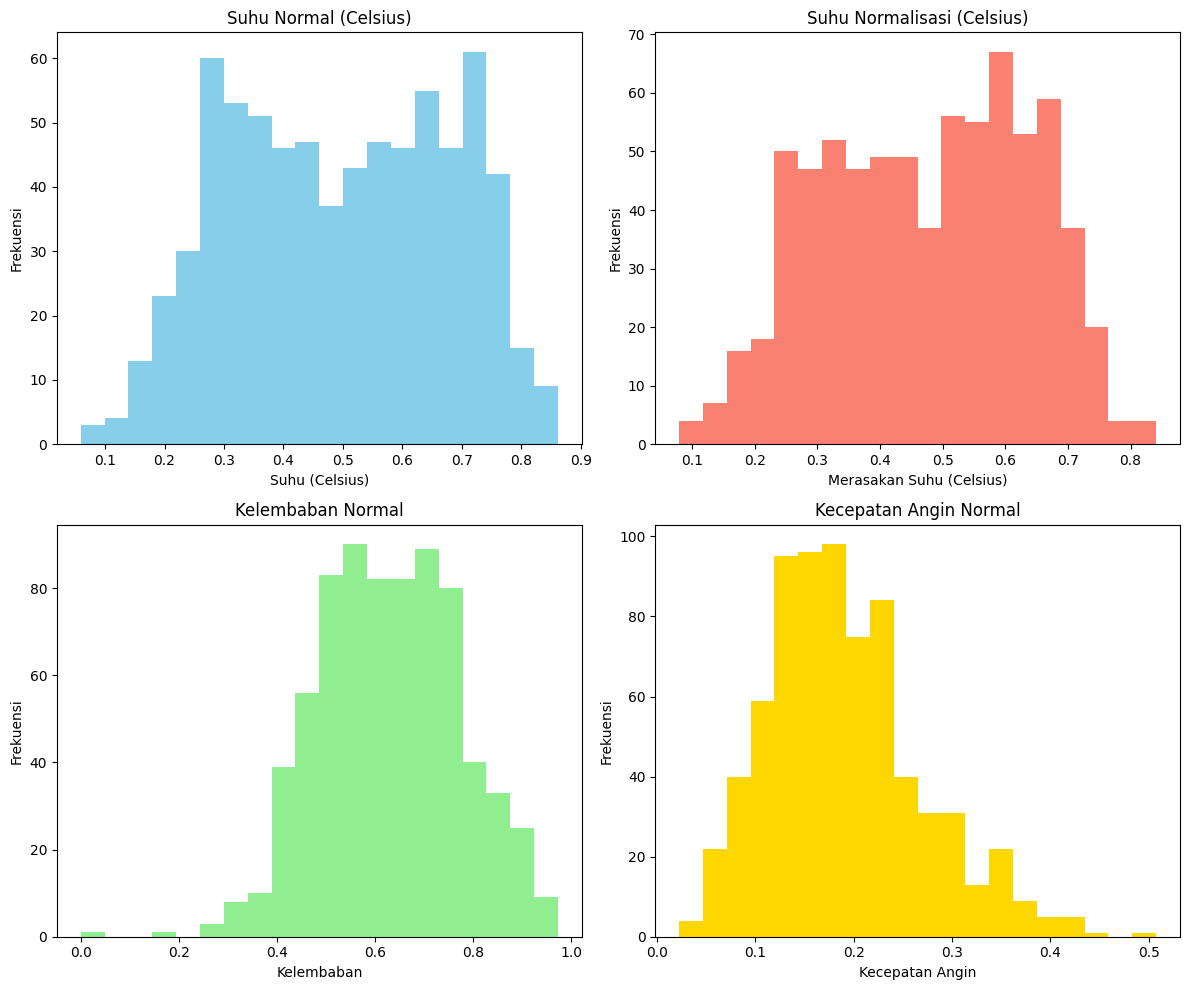

In [18]:
# variabel distribusi cuaca
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

axes[0, 0].hist(days_df['temp'], bins=20, color='skyblue')
axes[0, 0].set_title('Suhu Normal (Celsius)')
axes[0, 0].set_xlabel('Suhu (Celsius)')
axes[0, 0].set_ylabel('Frekuensi')

axes[0, 1].hist(days_df['atemp'], bins=20, color='salmon')
axes[0, 1].set_title('Suhu Normalisasi (Celsius)')
axes[0, 1].set_xlabel('Merasakan Suhu (Celsius)')
axes[0, 1].set_ylabel('Frekuensi')

axes[1, 0].hist(days_df['hum'], bins=20, color='lightgreen')
axes[1, 0].set_title('Kelembaban Normal')
axes[1, 0].set_xlabel('Kelembaban')
axes[1, 0].set_ylabel('Frekuensi')

axes[1, 1].hist(days_df['windspeed'], bins=20, color='gold')
axes[1, 1].set_title('Kecepatan Angin Normal')
axes[1, 1].set_xlabel('Kecepatan Angin')
axes[1, 1].set_ylabel('Frekuensi')

plt.tight_layout()

plt.show()

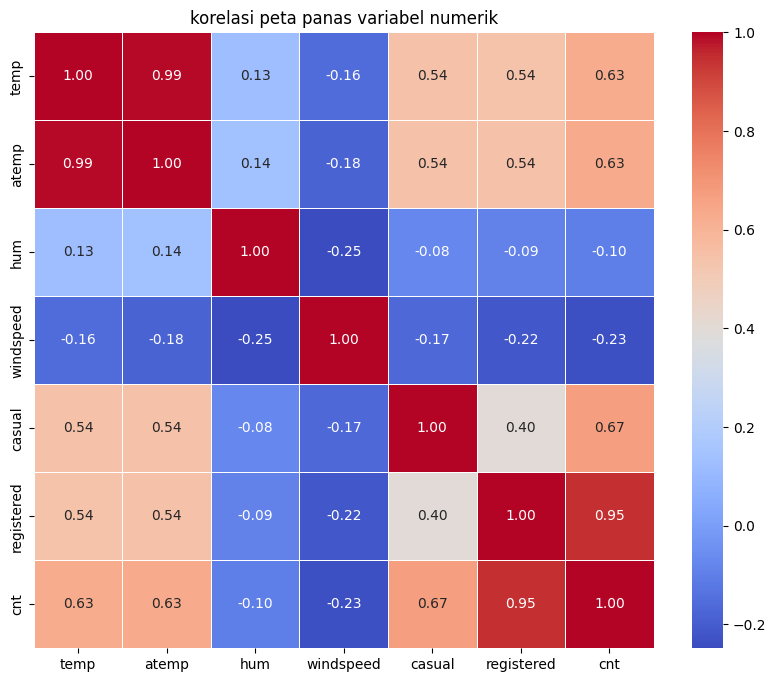

In [19]:
# korelasi peta panas variabel numerik
numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
correlation_matrix = days_df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('korelasi peta panas variabel numerik')
plt.show()


## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah ada korelasi antara kondisi cuaca dan tarif sewa sepeda?

Correlation between weather conditions and bike sharing levels:
weather_Clear            0.252870
weather_Light Snow      -0.239958
weather_Mist + Cloudy   -0.172879
dtype: float64


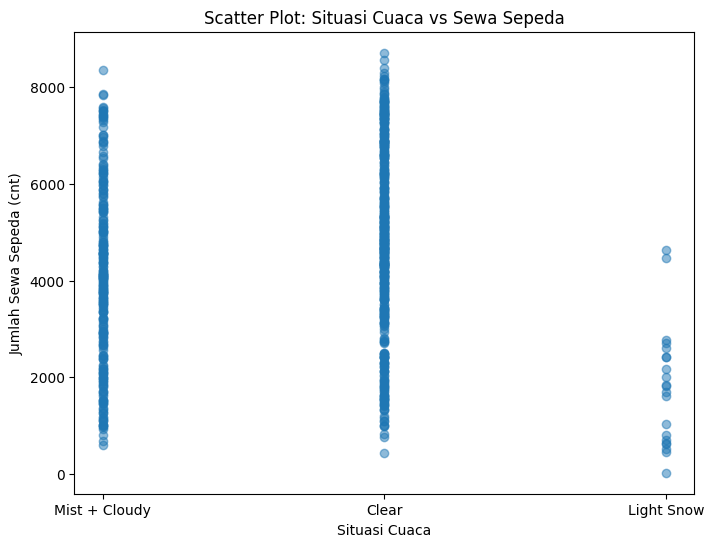

In [20]:
weather_dummies = pd.get_dummies(days_df['weathersit'], prefix='weather')

days_df = pd.concat([days_df, weather_dummies], axis=1)

weather_correlation = days_df.filter(regex='^weather_').corrwith(days_df['cnt'])

print("Correlation between weather conditions and bike sharing levels:")
print(weather_correlation)

plt.figure(figsize=(8, 6))
plt.scatter(days_df['weathersit'], days_df['cnt'], alpha=0.5)
plt.xlabel('Situasi Cuaca')
plt.ylabel('Jumlah Sewa Sepeda (cnt)')
plt.title('Scatter Plot: Situasi Cuaca vs Sewa Sepeda')
plt.show()

### Pertanyaan 2: Bagaimana tren penyewaan sepeda berubah dari musim ke musim

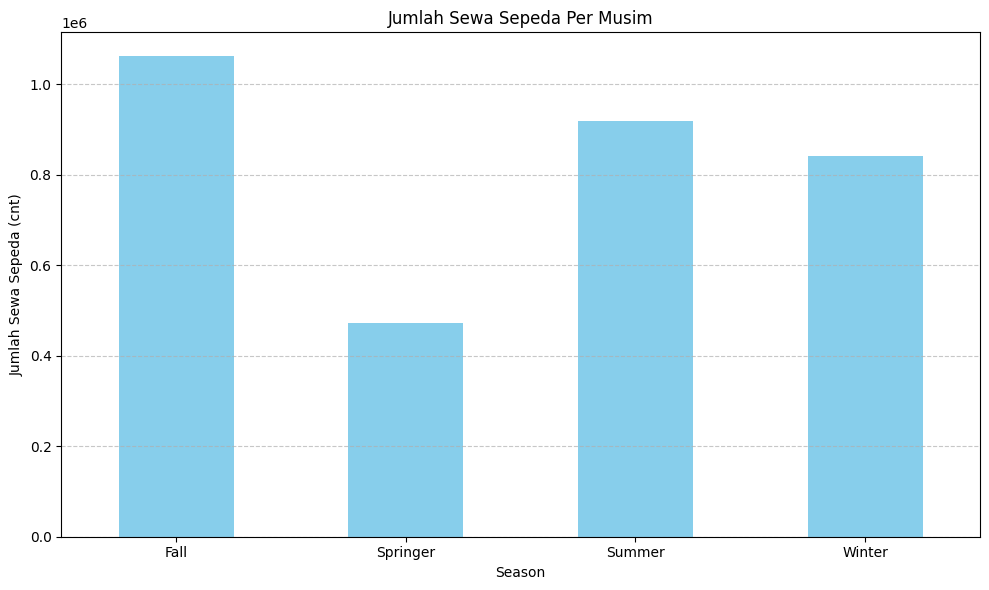

In [21]:
seosonal_data = days_df.groupby('season')['cnt'].sum()

plt.figure(figsize=(10, 6))
seosonal_data.plot(kind='bar', color='skyblue')

plt.xlabel('Season')
plt.ylabel('Jumlah Sewa Sepeda (cnt)')
plt.title('Jumlah Sewa Sepeda Per Musim')

plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Pertanyaan 3: Apakah ada pola khusus dalam penyewaan sepeda berdasarkan hari kerja atau hari libur?

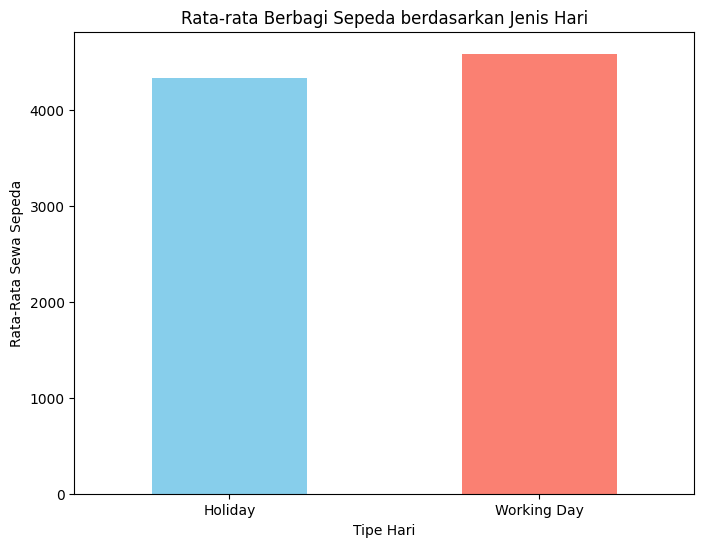

In [22]:
rentals_by_day_type = days_df.groupby(['workingday'])['cnt'].mean()

plt.figure(figsize=(8, 6))
rentals_by_day_type.plot(kind='bar', color=['skyblue', 'salmon'])

plt.xlabel('Tipe Hari')
plt.ylabel('Rata-Rata Sewa Sepeda')
plt.title('Rata-rata Berbagi Sepeda berdasarkan Jenis Hari')
plt.xticks(ticks=[0, 1], labels=['Holiday', 'Working Day'], rotation=0)

plt.show()

## Conclusion

1. Berdasarkan Scatter Plot: Situasi Cuaca vs Berbagi Sepeda, cuaca cerah (weather_Clear) menunjukkan korelasi positif yang kuat dengan tingkat penggunaan sepeda (cnt), yang berarti lebih banyak orang menggunakan layanan berbagi sepeda saat cuaca cerah. Sebaliknya, kondisi cuaca buruk seperti salju ringan (weather_Light Snow) dan berkabut disertai cuaca berawan (weather_Mist + Cloudy) menunjukkan korelasi negatif dengan tingkat penggunaan sepeda (cnt), yang menunjukkan lebih sedikit orang menggunakan layanan berbagi sepeda dalam kondisi cuaca buruk.

2. Berdasarkan tabel Jumlah penyewaan sepeda per Musim, terdapat variasi jumlah pengguna layanan penyewaan di setiap musim. Penggunaan sepeda sewaan tertinggi terjadi pada musim gugur, sementara yang terendah terjadi pada musim semi. Dari data ini, dapat disimpulkan bahwa tren penggunaan layanan sewa sepeda berbeda-beda di setiap musim.

3. Berdasarkan tabel Rata-rata Penggunaan Sepeda Bersama Berdasarkan Jenis Hari, rata-rata penggunaan layanan sepeda bersama lebih tinggi pada hari kerja dibandingkan dengan hari libur. Ini mengindikasikan bahwa pengguna lebih cenderung memilih layanan sepeda bersama pada hari kerja.



In [25]:
days_df.to_csv("/content/day_done.csv", index=False)